In [1]:
import numpy as np
import pandas as pd
from DS_models_stat import do_all_stats, cut_cat
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [2]:
#df41 = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
#df41 = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv')
#df41 = cut_cat(df41, big_pix=[41]) 
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
df = cut_cat(df, dict_cut={'l' : [0, 180], 'b' : [20, np.inf]})

In [3]:
mp_q = np.array(df['max_pred'].quantile(np.arange(0.0, 1.05, 0.05)))
mp_q

array([0.10000378, 0.10890712, 0.1182483 , 0.12854866, 0.14006515,
       0.15551981, 0.17133223, 0.18744986, 0.20758767, 0.22992003,
       0.25404191, 0.28104063, 0.31400775, 0.34916357, 0.39881441,
       0.45065277, 0.51897164, 0.61016452, 0.72655616, 0.87849908,
       1.        ])

In [4]:
true_cats = {#'PSZ2(z)' : '/home/rt2122/Data/clusters/planck_z.csv',
             #'PSZ2' : '/home/rt2122/Data/original_catalogs/csv/PSZ2.csv',
            #'MCXC' : '/home/rt2122/Data/original_catalogs/csv/MCXC.csv',
            #'ACT' : '/home/rt2122/Data/original_catalogs/csv/ACT.csv',
            #'Abell' : '/home/rt2122/Data/original_catalogs/csv/Abell.csv',
            'eROSITA' : '/home/rt2122/Data/SRGz/clusters/clusters1_b20_edit.csv'}
true_cats = {key : pd.read_csv(true_cats[key]) for key in true_cats}

#big_pix = [41]
#true_cats = {key : cut_cat(true_cats[key], big_pix = big_pix) for key in true_cats}
true_cats_sc = {key : SkyCoord(ra=np.array(true_cats[key]['RA']) * u.degree, 
                               dec=np.array(true_cats[key]['DEC']) * u.degree, frame='icrs') for key in true_cats}

In [5]:
prec = []
for st, en in tqdm(zip(mp_q[:-1], mp_q[1:])):
    cur_df = df[df['max_pred'] >= st]
    cur_df.index = np.arange(len(cur_df))
    
    stats = do_all_stats(cur_df, true_cats, true_cats_sc=true_cats_sc, match_dist=400/3600)
    prec.append(stats['precision'])

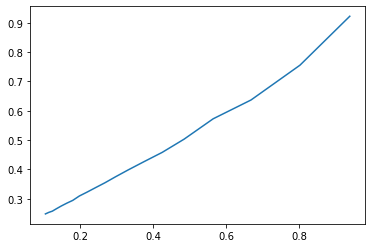

In [7]:
plt.plot((mp_q[:-1] + mp_q[1:])/2, prec)

In [8]:
for st, en, prec_val in zip(mp_q[:-1], mp_q[1:], prec):
    print(st, prec_val)

0.10000378219410776 0.24809298946603706
0.10890712453983725 0.25325006372673975
0.11824830270239284 0.2575003363379524
0.12854865989647807 0.2655270655270655
0.1400651528344042 0.2750113515967913
0.15551981120370328 0.28495318049725543
0.1713322275131941 0.29423975090814736
0.18744985535740852 0.30923994038748137
0.20758766699582337 0.32250252270433905
0.22992002842947837 0.3377366798767063
0.2540419101715088 0.35423728813559324
0.28104062611237174 0.37530266343825663
0.31400775080546733 0.3983050847457627
0.34916356724686914 0.425804219993082
0.39881440848112104 0.4580306698950767
0.4506527683697641 0.5031476997578692
0.5189716436900202 0.572639225181598
0.6101645247545096 0.6368038740920097
0.7265561637468636 0.7554479418886199
0.8784990804269905 0.9225181598062954


In [9]:
mp_q[0] = 0
mp_q[-1] = 1
mp_q

array([0.        , 0.10890712, 0.1182483 , 0.12854866, 0.14006515,
       0.15551981, 0.17133223, 0.18744986, 0.20758767, 0.22992003,
       0.25404191, 0.28104063, 0.31400775, 0.34916357, 0.39881441,
       0.45065277, 0.51897164, 0.61016452, 0.72655616, 0.87849908,
       1.        ])

In [10]:
prec.append(1.0)

In [11]:
def find_prec(st, en, prec1, prec2, cur_mp):
    
    def find_kb(coords1, coords2):
        #y1 = kx1 + b
        #y2 = kx2 + b
        #y1- y2 = k(x1 - x2)
        #k = (y1-y2)/(x1-x2)
        #b=y1-kx1
        k = coords1[1] - coords2[1]
        k /= coords1[0] - coords2[0]
        b = coords1[1] - k * coords1[0]
        return k, b
    
    k, b = find_kb([st, prec1], [en, prec2])
    if st <= cur_mp and cur_mp <= en:
        return k * cur_mp + b
    else:
        return -1

In [12]:
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
#df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv')
df = df.sort_values(by='max_pred', axis='index', ascending=True)
df['mpp_er'] = 0
df.index = np.arange(len(df))
df.head(4)

,RA,DEC,area,min_rad,max_rad,mean_rad,min_pred,max_pred,tRA,tDEC,status,catalog,M500,z,pix2,mpp_er
0,80.739063,-1.298711,1.0,0.000000e+00,1.414214,0.853553,0.100002,0.100002,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0
1,149.798243,54.081141,1.0,0.000000e+00,1.414214,0.853553,0.100004,0.100004,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0
2,64.810863,-26.402030,1.0,1.136868e-13,1.414214,0.853553,0.100010,0.100010,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0
3,13.129393,39.918397,1.0,0.000000e+00,1.414214,0.853553,0.100023,0.100023,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0


In [13]:
i = 0
st = mp_q[i]
en = mp_q[i + 1]
prec1 = prec[i]
prec2 = prec[i + 1]
for j in tqdm(range(len(df))):
    line = df.iloc[j]
    mp = line['max_pred']
    if mp > en:
        i += 1
        st = mp_q[i]
        if i + 1 >= len(mp_q):
            en = 1
        else:
            en = mp_q[i + 1]
        prec1 = prec[i]
        prec2 = prec[i + 1]
    prec_val = find_prec(st, en, prec1, prec2, mp)
    if prec_val < 0 or not (prec1 <=prec_val and prec_val <= prec2):
        break
    df.loc[j, 'mpp_er'] = prec_val

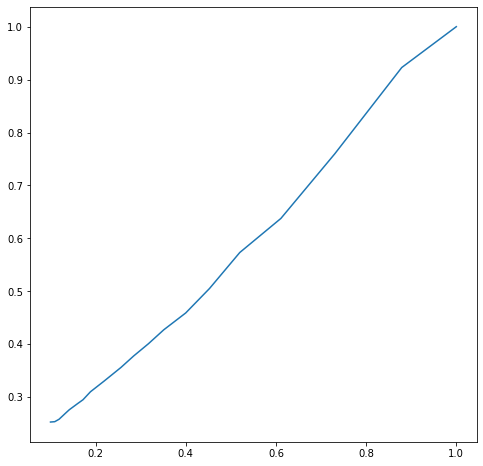

In [14]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(df['max_pred'], df['mpp_er'])

In [15]:
df

,RA,DEC,area,min_rad,max_rad,mean_rad,min_pred,max_pred,tRA,tDEC,status,catalog,M500,z,pix2,mpp_er
0,80.739063,-1.298711,1.0,0.000000e+00,1.414214,0.853553,0.100002,0.100002,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.252828
1,149.798243,54.081141,1.0,0.000000e+00,1.414214,0.853553,0.100004,0.100004,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.252828
2,64.810863,-26.402030,1.0,1.136868e-13,1.414214,0.853553,0.100010,0.100010,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.252829
3,13.129393,39.918397,1.0,0.000000e+00,1.414214,0.853553,0.100023,0.100023,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.252829
4,55.778215,77.164844,1.0,0.000000e+00,1.414214,0.853553,0.100039,0.100039,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.252830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23347,243.983913,-6.150970,40.0,1.935608e+00,5.988273,3.705241,0.106300,0.999788,243.954880,-6.152363,tp,planck_z,16.116468,0.203,train_pix,0.999865
23348,90.796013,42.214613,33.0,1.811333e+00,5.601533,3.515987,0.103833,0.999954,90.839443,42.232290,tp,planck_z,10.759314,0.228,train_pix,0.999971
23349,85.663133,-1.720311,64.0,7.749851e-01,7.825358,5.091448,0.100268,0.999978,NaN,NaN,fp,NaN,NaN,NaN,train_pix,0.999986
23350,85.277300,-1.613652,36.0,2.201086e+00,5.766286,3.571320,0.112442,1.000000,NaN,NaN,fp,NaN,NaN,NaN,train_pix,1.000000


In [16]:
df.to_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn_mpp_er.csv', index=False)
#df.to_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn_mpp.csv', index=False)